## a.Divide the dataset as development and test

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import Counter
np.random.seed(50)

data=np.genfromtxt('iris.csv',dtype=str,delimiter=',')
total_index=np.arange(0,data.shape[0])
np.random.shuffle(total_index)

train_index=total_index[:int(0.6*data.shape[0])]
train_data=np.asarray(data[train_index][:,:-1],dtype=np.float)
train_names=data[train_index][:,-1]


development_index=total_index[int(0.6*data.shape[0]):int(0.8*data.shape[0])]
development_data=np.asarray(data[development_index][:,:-1],dtype=np.float)
development_names=data[development_index][:,-1]

test_index=total_index[int(0.8*data.shape[0]):]
test_data=np.asarray(data[test_index][:,:-1],dtype=np.float)
test_names=data[test_index][:,-1]

print(train_index)
print(development_index)
print(test_index)

#print(dev_data)
#print(dev_names)
#print(test_data)
#print(test_names)
#print(dev_data.shape)


[ 88  72  20  16 147 140 113  23  12  68  39 130  34 112  55  25  82  48
  81  77 100  80  14 131  86 118  56  54  97 143 125  98  73 144  21   3
  59 119  84   7  41  57 104   8 102  17  42  18 146 114  75   5  15  63
 142  99  50  27  38 122 117  74 103  40  37 116  78   4  53  44 107 137
  65 128  69  47  87  32  89  52  29   9  61   1  83  45  90 127 129 135]
[ 58 123  36 101  13  62  46 136  24  28 138 149 120 124  11 148  94 108
  93   0  51 110  10 126  67  96  76  66 121  60]
[ 26 115  35 105  30  79 141  19   6  64 106  85  49  31  43 134  91  92
 111  71  95   2 133  22 145  70 132  33 109 139]


## b.implementing knn using distance metric Euclidean distance

In [2]:
def euclidean_distance(test_row,train_data):
    
    return np.sqrt(np.sum((train_data-test_row)**2,axis=1))

def knn(test_row,train_data,metric,k):
    dist=metric(test_row,train_data)
    require_index=dist.argsort()[:k]
    
    required_names=train_names[require_index]
    cnt=Counter(required_names)
    result=cnt.most_common()[0][0]
    
    return result 


#class_label=knn(dev_data[0],train_data,euclidean_distance,65)
#print(class_label)
    

## b.implementing knn using distance metric Normalized Euclidean distance

In [3]:
def normalized_euclidean_distance(test_row,train_data):
    
    norm_train_data=(train_data-train_data.mean(axis=0))/train_data.std(axis=0)
    norm_test_row=(test_row-train_data.mean(axis=0))/train_data.std(axis=0)
    return np.sqrt(np.sum((norm_train_data-norm_test_row)**2,axis=1))

class_label=knn(development_data[0],train_data,normalized_euclidean_distance,65)
#print(class_label)
    

## b.implimenting knn using distance metric Cosine Similarity

In [4]:
def cosine_similarity(test_row,train_data):
    dist=[]
    for rec in train_data:
        dot_product=np.dot(test_row,rec)
        mod_product=np.linalg.norm(test_row)*np.linalg.norm(rec)
        dist.append(1-(dot_product/mod_product))
    return np.array(dist)
#class_label=knn(development_data[0],train_data,cosine_similarity,65)
#print(class_label)

## c.calculating accuracy using Development dataset , finding optimal hyper parameters
## and drawing bar charts for accuracy

                 k=1       k=3       k=5       k=7
eucli       1.000000  0.966667  0.900000  0.900000
norm_eucli  0.933333  0.933333  0.933333  0.966667
cosine      1.000000  1.000000  1.000000  1.000000


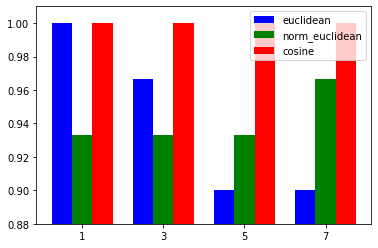

In [5]:
def accuracy(verify_names,verify_data,train_data,metric,k):
    accurate=0
    for i,verify_row in enumerate(verify_data):
        class_label= knn(verify_row,train_data,metric,k)
        #print(class_label,verify_names[i])
        if(verify_names[i]==class_label):
            accurate+=1
    return accurate/verify_data.shape[0]

euclidean_accuracy=[]
normalized_euclidean_accuracy=[]
cosine_accuracy=[]
required_k= np.array([1,3,5,7])
for k in required_k:
    
    euclidean_accuracy.append(accuracy(development_names,development_data,train_data,euclidean_distance,k))
    normalized_euclidean_accuracy.append(accuracy(development_names,development_data,train_data,normalized_euclidean_distance,k))
    cosine_accuracy.append(accuracy(development_names,development_data,train_data,cosine_similarity,k))                                  

k=np.vstack((euclidean_accuracy,normalized_euclidean_accuracy,cosine_accuracy))
pd_test=pd.DataFrame(k,columns=['k=1','k=3','k=5','k=7'])
pd_test.index=['eucli','norm_eucli','cosine']
print(pd_test)

ax = plt.subplot(111)
ax.bar(required_k-0.5,euclidean_accuracy, width=0.5, color='b', align='center',label='euclidean')
ax.bar(required_k,normalized_euclidean_accuracy, width=0.5, color='g', align='center',label='norm_euclidean')
ax.bar(required_k+0.5,cosine_accuracy, width=0.5, color='r', align='center',label='cosine')

min_value=min((euclidean_accuracy+normalized_euclidean_accuracy+cosine_accuracy))
max_value=max((euclidean_accuracy+normalized_euclidean_accuracy+cosine_accuracy))
ax.set_xticks(required_k)
ax.set_ylim(min_value-0.02,max_value+0.01)
ax.legend()

From my observations at k=5 and k=7 we are getting consistent accuracy.i am choosing k=7 as it is optimal and consistent.

## d. with test data set finding final accuracy by using optimal hyper parameter

                 k=7
eucli       0.933333
norm_eucli  0.900000
cosine      0.966667


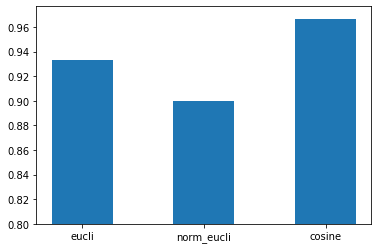

In [6]:
eucli_test_accuracy=accuracy(test_names,test_data,train_data,euclidean_distance,7)

norm_eucli_test_accuracy=accuracy(test_names,test_data,train_data,normalized_euclidean_distance,7)

cosine_test_accuracy=accuracy(test_names,test_data,train_data,cosine_similarity,7)
plt.bar(['eucli','norm_eucli','cosine'],[eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy],width=0.5)
min_value=min(eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy)
max_value=max(eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy)
plt.ylim(min_value-0.1,max_value+0.01)



k=np.vstack((eucli_test_accuracy,norm_eucli_test_accuracy,cosine_test_accuracy))
pd_test=pd.DataFrame(k,columns=['k=7'])
pd_test.index=['eucli','norm_eucli','cosine']
print(pd_test)



From the results above, the cosine similarity with k=7 gives the best optimal accurasy.